# Laboratory 2.3

Welcome to Lab 2.3. In this Lab, we will learn how to adjust parameters to improve the performance of the YOLOv5 model.

## Instructions

Below are the steps to help you improve the performance of the YOLOv5 model.


### Libraries

In [ ]:
#clone YOLOv5
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

### Dataset

Number of photos per class:

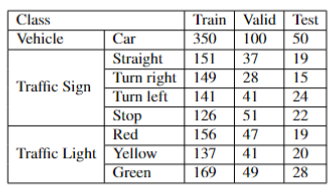




Dataset details for traffic sign and traffic light recognition model:

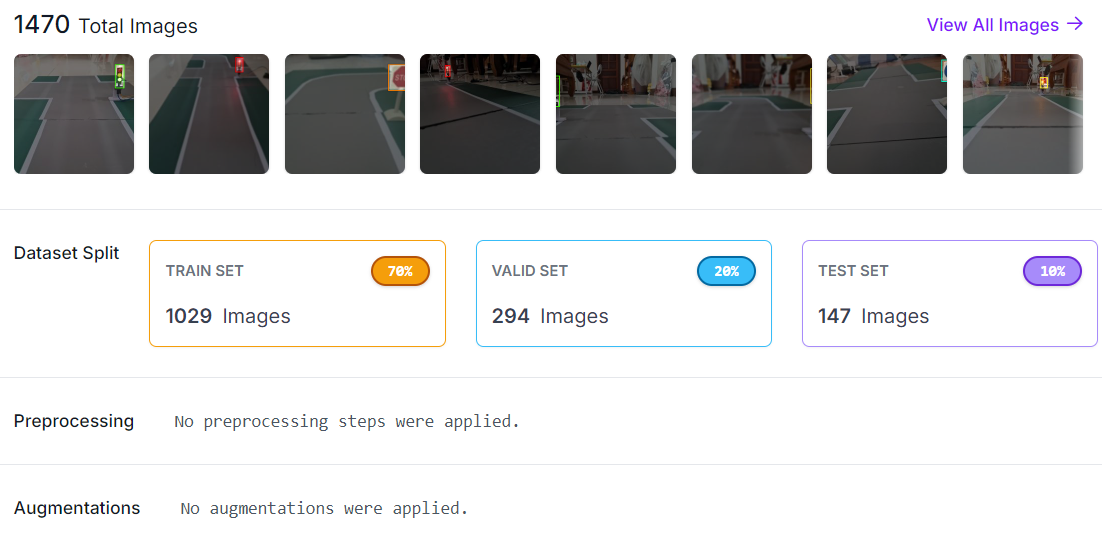

Dataset details for vehicle identification model:

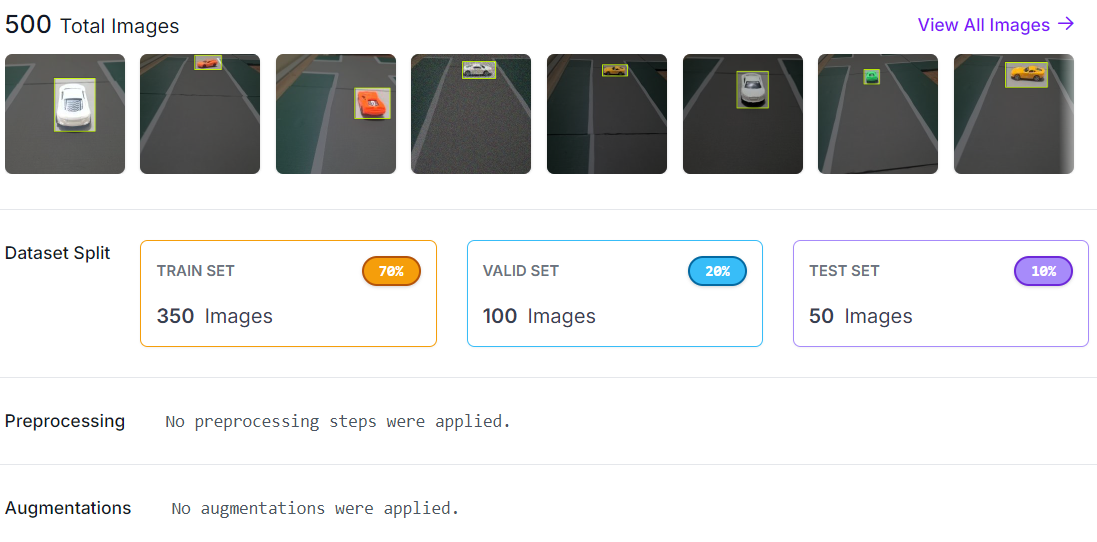

In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

**Bài tập 1:** Hoàn thành đoạn code sau để tải dataset lên colab.

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key=[...])
project = rf.workspace().project([...])
version = project.version([...])
dataset = project.version([...]).download([...])

### Model

### Hyperparameters Adjustment

After multiple experiments, we have decided to use the following hyperparameters:

1. **img**: 640

2. **rect**: False

3. **batch**: 16

4. **epochs**: 100

5. **weights**: ""

6. **cfg**: yolov5s

7. **patience**: 20

8. **hyp**:
   - Disable the `fliplr` function for the traffic sign detection model as it causes the model to misclassify left and right signs.
   - The vehicle detection model remains unchanged.

9. **data**: detailed as mentioned above.


Solution to exercise 2

In [ ]:
# model traffic signals detection
# Download the file "hyp.yaml", edit it on your laptop then upload again to Colab
!python train.py --img 640 --batch 16 --epochs 100 --data [...] --cfg "/content/yolov5/models/yolov5s.yaml" --weights '' --name [...] --cache --patience 20 --hyp [...]

# model car detection
#!python train.py --img 640 --batch 16 --epochs 100 --data [...] --cfg "/content/yolov5/models/yolov5s.yaml" --weights '' --name [...] --cache --patience 20


### Model Evaluation

It is noticeable that the model shows signs of overfitting. However, this is not a major concern as I want the model to perform optimally within our specific environment.


In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

### Run the Detect Function with Trained Weights

Solution to exercise 3

In [ ]:
!python detect.py --weights [...] --img [...] --conf [...] --source [...]

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

### Save the weights

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download([...])